# Linear and Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
df=pd.read_csv("HRV.csv")

In [3]:
df.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


## Dataset Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
df.describe()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4234.000000,4234.000000,4234.000000,4184.000000,4234.000000,4234.000000,4215.000000,4233.000000,3847.000000,4234.000000
mean,0.428909,49.583845,0.494095,236.723231,132.347780,82.886042,25.800624,75.882825,81.976085,0.151630
std,0.494979,8.575050,0.500024,44.608268,22.046338,11.911857,4.081183,12.031365,23.966195,0.358704
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,263.000000,144.000000,89.500000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [7]:
#imputing missing data as the median in totChol
chol_median=df['totChol'].median()

In [8]:
print(chol_median)

234.0


In [9]:
df['totChol']=df['totChol'].fillna(chol_median)

In [10]:
BMI_median=df['BMI'].median()
df['BMI'].fillna(BMI_median, inplace=True)

In [12]:
heartrate_median=df['heartRate'].median()
df['heartRate'].fillna(heartrate_median, inplace=True)

In [14]:
glucose_median=df['glucose'].median()
df['glucose'].fillna(glucose_median, inplace=True)

In [15]:
df.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## A. Linear Regression - Create a model to predict the cholestrol level of a person

In [16]:
df.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [17]:
x= df[['male', 'age', 'currentSmoker', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD']]
y= df[['totChol']]

## Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=0)

## Training the Linear Regression model 

In [19]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(x_train.values, y_train)

LinearRegression()

## Model performance check- R Square and RMSE score

In [20]:
y_pred=regressor.predict(x_test.values)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print(f"MSE: {mean_squared_error(y_test, y_pred): .2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, y_pred)): .2f}")
print(f"R-Square: {r2_score(y_test, y_pred): .2f}")

MSE:  2045.40
RMSE:  45.23
R-Square:  0.06


## Predicting new results where the actual results are given
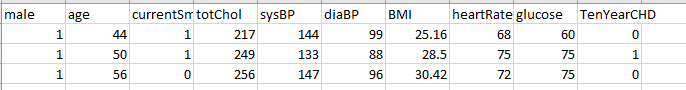

In [22]:
# case 1 actual 217
regressor.predict([[1,44,1,144,99,25.16,68,60,0]])

array([[229.38466847]])

In [23]:
# case 2 actual 249
regressor.predict([[1,50,1,133,88,28.5,75,75,1]])

array([[236.92492778]])

In [24]:
# case 3 actual 256
case3=regressor.predict([[1,56,0,147,96,30.42,72,75,0]])

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

In [26]:
x=df[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]
y=df[['TenYearCHD']]

### Create independent and dependent variables to predict

In [27]:
x2=df[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]
y2=df[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=.20,random_state=0)

## Training the Logistic Regression model 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(x_train.values,y_train)
y_pred=classifier.predict(x_test.values)

C:\Users\jaden\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y_pred=classifier.predict(x_test.values)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


In [33]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[714   6]
 [123   4]]


In [34]:
classifier.classes_

array([0, 1], dtype=int64)

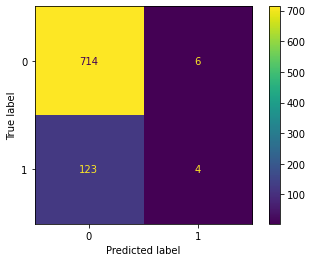

In [35]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

## True Negative = 714 were correctly predicted to not be at risk

## False Positive = 6 were preditced to be at risk, but were not at risk

## False Negative = 123 were predicted to not be at risk, but were at risk

## True Positive = 4 were correctly predicted to be at risk

### Create independent and dependent variables to predict 

## Predicting new results where the actual results are given
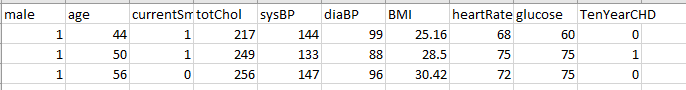

In [36]:
case_1=classifier.predict([[1,44,1,217,144,99,25.16,68,60]])
print('The expected value for case 1 is',case_1)

The expected value for case 1 is [0]


In [37]:
case_2=classifier.predict([[1,50,1,249,133,88,28.5,75,75]])
print('The expected value for case 2 is',case_2)

The expected value for case 2 is [0]


In [38]:
case_3=classifier.predict([[1,56,0,256,147,96,30.42,72,75]])
print('The expected value for case 3 is',case_3)

The expected value for case 3 is [0]


### Summary

## The data showed that the logical predictions were less accurate than the linear predictions. The matrix found that the majority of cases were true negatives. However, a considerable amount of cases were false negatives. The r-squared value was weak at just 0.6, making it difficult to predict a 1.